In [1]:
#Importing Required Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd


'C:\\Users\\ASUS'

In [17]:
cd C:\Machine skillaton #set path

[WinError 2] The system cannot find the file specified: 'C:\\Machine skillaton #set path'
C:\Machine skillaton


In [18]:
pwd # to check path

'C:\\Machine skillaton'

In [104]:
data=pd.read_csv('house_rental_dataUC.csv') #loading data

In [105]:
data.head(10)   #to display top 10 rows

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7.0,2,2,2,62000
1,2,2134.800,5,7.0,4,2,2,78000
2,3,1138.560,5,7.0,2,2,1,58000
3,4,1458.780,2,7.0,3,2,2,45000
4,5,967.776,11,14.0,3,2,2,45000
5,6,1127.886,11,12.0,4,2,2,148000
6,7,1352.040,5,7.0,3,2,1,58000
7,8,757.854,5,14.0,1,zero,1,48000
8,9,1152.792,10,12.0,3,2,2,45000
9,10,1423.200,4,5.0,4,2,2,65000


In [106]:
data.shape

(645, 8)

In [107]:
data.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor     float64
Bedroom          int64
Living.Room     object
Bathroom         int64
Price            int64
dtype: object

In [108]:
#droping the irrevalent rows
data=data.drop(['Unnamed: 0'],axis=1)

In [109]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7.0,2,2,2,62000
1,2134.800,5,7.0,4,2,2,78000
2,1138.560,5,7.0,2,2,1,58000
3,1458.780,2,7.0,3,2,2,45000
4,967.776,11,14.0,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15.0,3,2,2,45000
641,377.148,4,10.0,1,1,1,24800
642,740.064,13,14.0,1,1,1,45000
643,1707.840,3,14.0,3,2,2,65000


In [110]:
#Renaming the header of columns

data=data.rename(columns={'TotalFloor':'Total','Bedroom':'B.Rom','Living.Room':'L.Rom','Bathroom':'Bat.Rom'})

In [111]:
data.head(10)

,Sqft,Floor,Total,B.Rom,L.Rom,Bat.Rom,Price
0,1177.698,2,7.0,2,2,2,62000
1,2134.800,5,7.0,4,2,2,78000
2,1138.560,5,7.0,2,2,1,58000
3,1458.780,2,7.0,3,2,2,45000
4,967.776,11,14.0,3,2,2,45000
5,1127.886,11,12.0,4,2,2,148000
6,1352.040,5,7.0,3,2,1,58000
7,757.854,5,14.0,1,zero,1,48000
8,1152.792,10,12.0,3,2,2,45000
9,1423.200,4,5.0,4,2,2,65000


In [112]:
data.count()

Sqft       645
Floor      645
Total      639
B.Rom      645
L.Rom      645
Bat.Rom    645
Price      645
dtype: int64

In [136]:
#finding the null value

data.isnull().sum()

Sqft       0
Floor      0
Total      6
B.Rom      0
L.Rom      0
Bat.Rom    0
Price      0
dtype: int64

In [114]:
data['Total'].unique()

array([ 7., 14., 12.,  5., 11., 19., 13.,  9., 21., 15., 24.,  4.,  6.,
       25.,  3., 10.,  8., nan, 17., 20., 16., 18., 38., 27., 26.,  1.])

In [128]:
data['L.Rom'].unique()

array(['2', 'zero', '1', '3', '4'], dtype=object)

In [134]:
data['L.Rom']=data['L.Rom'].replace('zero','0') #zero is converted in number 0

In [135]:
data.head(10)

,Sqft,Floor,Total,B.Rom,L.Rom,Bat.Rom,Price
0,1177.698,2,7.0,2,2,2,62000
1,2134.800,5,7.0,4,2,2,78000
2,1138.560,5,7.0,2,2,1,58000
3,1458.780,2,7.0,3,2,2,45000
4,967.776,11,14.0,3,2,2,45000
5,1127.886,11,12.0,4,2,2,148000
6,1352.040,5,7.0,3,2,1,58000
7,757.854,5,14.0,1,0,1,48000
8,1152.792,10,12.0,3,2,2,45000
9,1423.200,4,5.0,4,2,2,65000


<function matplotlib.pyplot.show(*args, **kw)>

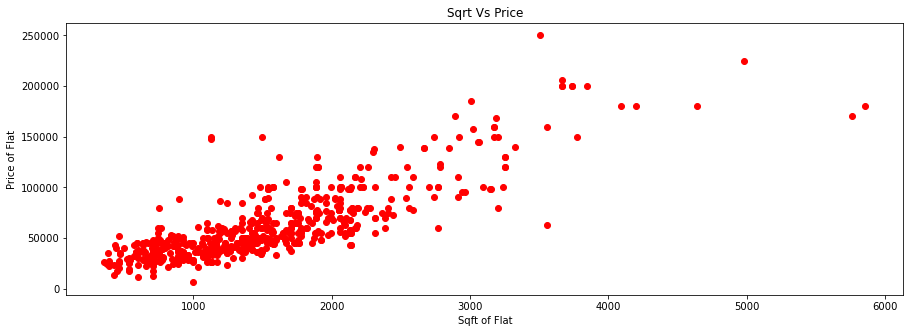

In [142]:
#Sqft vs Price_Linear Regression module
#This dataset contains differnt features of flats and based on features dependency of price 
# The objective is to use linear regression model to understand how Sqrt value impact price

#to visual sqrt vs price

plt.figure(figsize=(15,5))
plt.scatter(data['Sqft'],data['Price'],c='Red')
plt.xlabel('Sqft of Flat')
plt.ylabel('Price of Flat')
plt.title('Sqrt Vs Price')
plt.show

In [144]:
##MOST OF FLATS ARE WITHIN 500 TO 2500 SQRT FOOT
#More sqrt foot more price increase of flat

#Reshaping the data to pass on the model.
X = data['Sqft'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

In [180]:
X=np.log(X)
y=np.log(y)#FEATURE ENGINEERING

In [181]:
y

array([[2.40106204],
       [2.421653  ],
       [2.39500002],
       [2.37159029],
       [2.37159029],
       [2.47695575],
       [2.39500002],
       [2.37759574],
       [2.37159029],
       [2.40533503],
       [2.33618837],
       [2.32972545],
       [2.35814438],
       [2.37759574],
       [2.39014609],
       [2.44347036],
       [2.37759574],
       [2.3151687 ],
       [2.43427673],
       [2.34221561],
       [2.47227704],
       [2.44347036],
       [2.39014609],
       [2.44769926],
       [2.50193359],
       [2.44171403],
       [2.50193359],
       [2.47523411],
       [2.3151687 ],
       [2.311245  ],
       [2.40533503],
       [2.42925356],
       [2.39014609],
       [2.39341311],
       [2.37363953],
       [2.38499414],
       [2.36842117],
       [2.39808615],
       [2.50193359],
       [2.35054388],
       [2.47523411],
       [2.37759574],
       [2.35054388],
       [2.40533503],
       [2.41199993],
       [2.38137578],
       [2.37759381],
       [2.423

In [182]:
#nEED TO SPILT DATA INTO TRAIN AND TEST MODEL


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [183]:
print(X_test.shape)

(129, 1)


In [151]:
print(X_train.shape)

(516, 1)


In [184]:
# Initializing Linear Regression Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)  #Fitting the model into the dataset

LinearRegression()

In [185]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

0.508848072772294
1.383949536403667


In [186]:
print("The model is: Price = {:.5} + {:.5}(Sqft)".format(reg.intercept_[0], reg.coef_[0][0]))

The model is: Price = 1.3839 + 0.50885(Sqft)


In [187]:
# Doing predictions in the test set
predictions = reg.predict(X_test)

In [188]:
#Storing the value of Actual Sales value and the predicted value
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicitions' : predictions.flatten()})

In [189]:
df.head(10)

,Actual,Predicitions
0,2.443470,2.432337
1,2.326298,2.367095
2,2.390146,2.405060
3,2.367338,2.420488
4,2.315169,2.336437
5,2.471604,2.439123
6,2.483483,2.446040
7,2.384992,2.408129
8,2.350544,2.396134
9,2.365128,2.357156


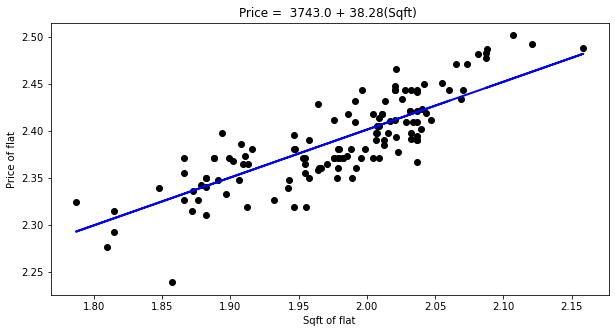

In [190]:
#Plotting Tv and sales data with Linear regression line
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, c='black')
plt.plot(X_test, predictions, c='blue', linewidth=2)
plt.xlabel("Sqft of flat")
plt.ylabel("Price of flat")
plt.title("Price =  3743.0 + 38.28(Sqft) ")
plt.show()

In [191]:
from sklearn import metrics
metrics.mean_squared_error(y_test, predictions) #Calculating MSE


0.0006873252298730189

In [192]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))


0.02621688825686639

In [193]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, predictions)

In [194]:
coefficient_of_dermination

0.6887213971517072